# Imports

In [1]:
from Twitter import TwitterAccess
import pandas as pd
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from collections import Counter
pd.options.display.max_colwidth = None
import nltk
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from spellchecker import *
import random
import numpy as np
from multiprocessing import  Pool

[nltk_data] Downloading package stopwords to C:\Users\SHOAIB
[nltk_data]     MALIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.


In [3]:
# CONSUMER_KEY = 
# CONSUMER_SECRET = 
# ACCESS_TOKEN = 
# ACCESS_SECRET = 

CONSUMER_KEY = 'cODIhZmrqZvIe2GumNB7BwUC1'
CONSUMER_SECRET = 'MfnjZ42C4Yjp5z95N20ZkOSN1rNGeXy2HtMD82gYls0BN0h1TO'
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAALM%2FXQEAAAAAHtPx3bdURWjCN4Y%2B4%2FIIgLaFP%2F0%3DkvtGDkLl8a2eZqXo7USpYwscLegiLgIuPbo4hi2DRbkvgFvvZn'
ACCESS_TOKEN = '749623811243335680-pijkJsfWFLLsMlER7kjNrcyEnXE5aAy'
ACCESS_SECRET = 'bXa5FngFfo0HKuC5Ps6kuU5s3pyNdmmv1bGLlIeb1b0XH'

api = TwitterAccess(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_SECRET)

tweet_id = 1460979601308487680

print(api.tweet_text_from_tweet_id(tweet_id))
print(api.user_from_tweet_id(tweet_id))

@ibnjuned Yeah it would have been amazing but 😰
I really wanted to see it grow into a fully functional adult
('1113996437203845120', 'only_mota_xx')


# EDA

## OLID

In [4]:
DATA_PATH = '../data/OLID/'
PREPROCESSED = '../preprocessed/'

training_data = 'olid-training-v1.0.tsv'

olid = pd.read_csv(DATA_PATH + training_data, sep = '\t')
olid.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans what their take on this is.,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of shit to a volcano. 😂""",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illegals to move into red states,NOT,NaN,NaN


In [5]:
olid['subtask_a'].value_counts(normalize = True), olid['subtask_b'].value_counts(normalize = False), olid['subtask_c'].value_counts(normalize = False)

(NOT    0.667674
 OFF    0.332326
 Name: subtask_a, dtype: float64,
 TIN    3876
 UNT     524
 Name: subtask_b, dtype: int64,
 IND    2407
 GRP    1074
 OTH     395
 Name: subtask_c, dtype: int64)

In [6]:
olid[olid['subtask_c'] == 'GRP'].head(30)

,id,tweet,subtask_a,subtask_b,subtask_c
7,52415,@USER was literally just talking about this lol all mass shootings like that have been set ups. it’s propaganda used to divide us on major issues like gun control and terrorism,OFF,TIN,GRP
22,12681,@USER @USER Kind of like when conservatives wanna associate everyone to their left as communist antifa members?,OFF,TIN,GRP
23,82904,@USER @USER Da fuck is going on people? There's the men's room and the women's room Pick one and stick w it 🤔,OFF,TIN,GRP
32,12609,The only thing the Democrats have is lying and stalling to stop Trump from being #President. What have they done for you lately. #Trump #Kavanaugh #MAGA #DEMSUCK,OFF,TIN,GRP
37,14726,@USER @USER @USER That's expected if you placate the violent leftists/terrorists. #KavanaughConfirmation #woke,OFF,TIN,GRP
54,84102,4 out of 10 British people are basically full-on racists. 4 out of 10 voters vote for the Conservatives. Coincidence!???!???,OFF,TIN,GRP
74,64429,@USER I mean it worked for gun control right? URL,OFF,TIN,GRP
106,52252,@USER Fuck em,OFF,TIN,GRP
136,28812,@USER This all I get 😢 damn these haters deleting you IG for no reason... URL,OFF,TIN,GRP
146,96789,"@USER if the reason for Farakans illegal values are because he is black or Muslim, that would be a reason to detest him. I believe his illegal values are simply a result of bad character, like his supporters!""",OFF,TIN,GRP


## Class distribution

In [7]:
# x=olid.subtask_a.value_counts()
# sns.barplot(x.index,x)
# plt.gca().set_ylabel('tweets')



In [8]:
# x=olid.subtask_b.value_counts()
# sns.barplot(x.index,x, nor)
# plt.gca().set_ylabel('tweets')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


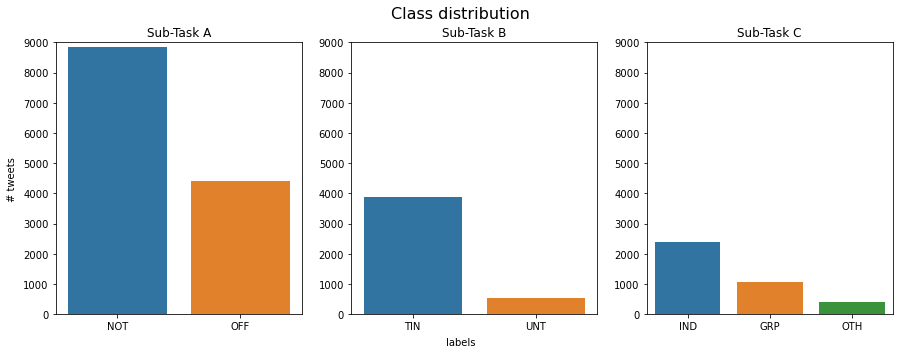

In [9]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
x=olid.subtask_a.value_counts()
sns.barplot(x.index, x.values, ax=ax1)
ax1.set_title('Sub-Task A')
ax1.set_ylim([0,9000])

x=olid.subtask_b.value_counts()
sns.barplot(x.index, x.values, ax=ax2)
ax2.set_title('Sub-Task B')
ax2.set_ylim([0,9000])

x=olid.subtask_c.value_counts()
sns.barplot(x.index, x.values, ax=ax3)
ax3.set_title('Sub-Task C')
ax3.set_ylim([0,9000])

fig.text(0.5, 0.04, 'labels', ha='center')
fig.text(0.08, 0.5, '# tweets', va='center',  rotation='vertical')
fig.suptitle('Class distribution', fontsize=16)

plt.savefig('./label_dist.png')

## Number of characters in tweets

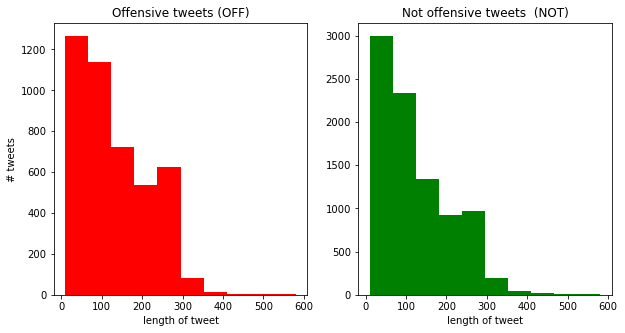

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=olid[olid['subtask_a']=='OFF']['tweet'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_ylabel('# tweets')
ax1.set_xlabel('length of tweet')
ax1.set_title('Offensive tweets (OFF)')
# ax1.set_ylim([0,3500])

tweet_len=olid[olid['subtask_a']=='NOT']['tweet'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not offensive tweets  (NOT)')
ax2.set_xlabel('length of tweet')
# ax2.set_ylim([0,3500])

# fig.suptitle('Histogram of # characters in tweets',fontsize=16)
plt.savefig('./hist_char.png')
plt.show()

## Number of words in tweets

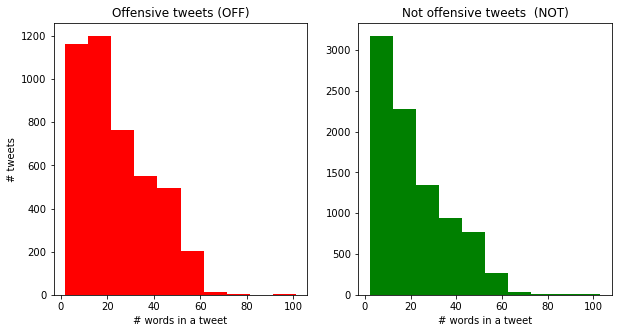

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len = olid[olid['subtask_a']=='OFF']['tweet'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('Offensive tweets (OFF)')
ax1.set_xlabel('# words in a tweet')
ax1.set_ylabel('# tweets')
# ax1.set_ylim([0,3500])

tweet_len = olid[olid['subtask_a']=='NOT']['tweet'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not offensive tweets  (NOT)')
ax2.set_xlabel('# words in a tweet')
# ax2.set_ylim([0,3500])

# fig.suptitle('Histogram of # words in a tweet', fontsize=16)
plt.savefig('./hist_words.png')
plt.show()

## Common stop words

In [12]:
def create_corpus(df, label, text,target):
    corpus=[]
    
    for x in df[df[label]==target][text].str.split():
        for i in x:
            corpus.append(i.lower())
    return corpus

def plot_top_stop(corpus, ax):
    stop=set(stopwords.words('english'))
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    sns.barplot(list(x),list(y), ax = ax)
    
def plot_top_punct(corpus, ax):
    dic=defaultdict(int)
    special = string.punctuation
    for i in (corpus):
        if i in special:
            dic[i]+=1

    x,y=zip(*dic.items())
    sns.barplot(list(x),list(y), ax = ax)
    
def plot_common_words(corpus, ax, n = 10):
    counter=Counter(corpus)
    stop= stopwords.words('english')
    stop.append('@user')
    stop=set(stop)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:n]:
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x, ax=ax)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Common stop words')

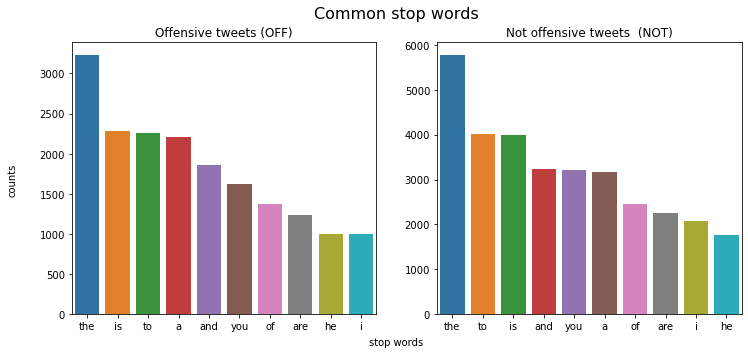

In [13]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))


corpus=create_corpus(olid, 'subtask_a', 'tweet', 'OFF')
plot_top_stop(corpus, ax1)
ax1.set_title('Offensive tweets (OFF)')
corpus=create_corpus(olid, 'subtask_a', 'tweet', 'NOT')
plot_top_stop(corpus, ax2)
ax2.set_title('Not offensive tweets  (NOT)')

fig.text(0.5, 0.04, 'stop words', ha='center')
fig.text(0.05, 0.5, 'counts', va='center',  rotation='vertical')
fig.suptitle('Common stop words', fontsize=16)

## Common Punct

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Common punctuations')

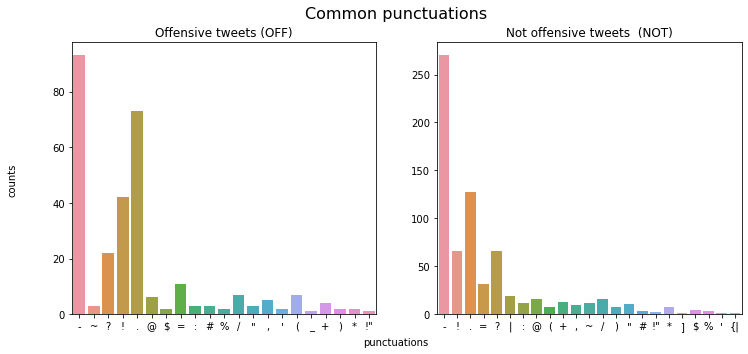

In [14]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))


corpus=create_corpus(olid, 'subtask_a', 'tweet', 'OFF')
plot_top_punct(corpus, ax1)
ax1.set_title('Offensive tweets (OFF)')

corpus=create_corpus(olid, 'subtask_a', 'tweet', 'NOT')
plot_top_punct(corpus, ax2)
ax2.set_title('Not offensive tweets  (NOT)')


fig.text(0.5, 0.04, 'punctuations', ha='center')
fig.text(0.05, 0.5, 'counts', va='center',  rotation='vertical')
fig.suptitle('Common punctuations', fontsize=16)

## Common words

Text(0.5, 0.98, 'Common Words')

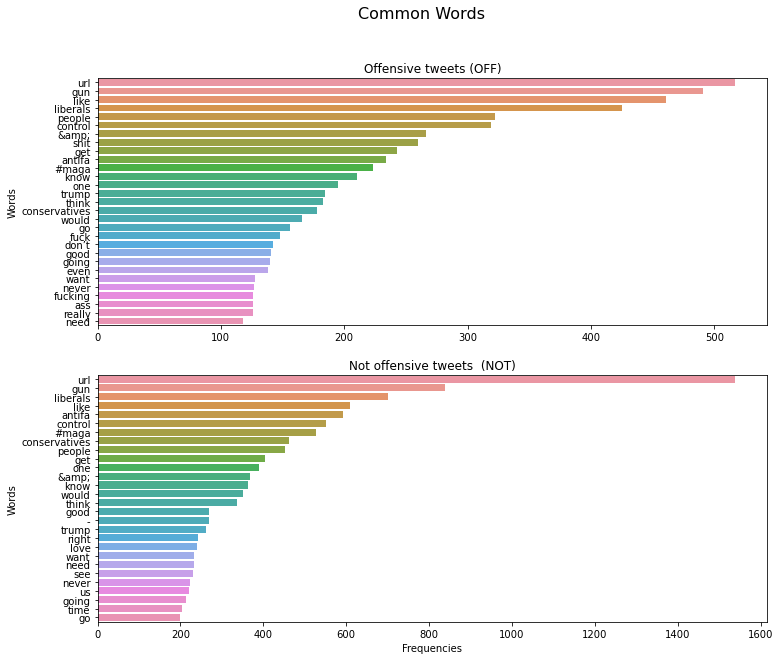

In [15]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,10))

corpus=create_corpus(olid, 'subtask_a', 'tweet', 'OFF')
plot_common_words(corpus, ax1, 100)
ax1.set_title('Offensive tweets (OFF)')
# ax1.set_xlabel('# words in a tweet')
ax1.set_ylabel('Words')

corpus=create_corpus(olid, 'subtask_a', 'tweet', 'NOT')
plot_common_words(corpus, ax2, 100)
ax2.set_title('Not offensive tweets  (NOT)')
ax2.set_xlabel('Frequencies')
ax2.set_ylabel('Words')

fig.suptitle('Common Words', fontsize=16)

## Popular Hashtags

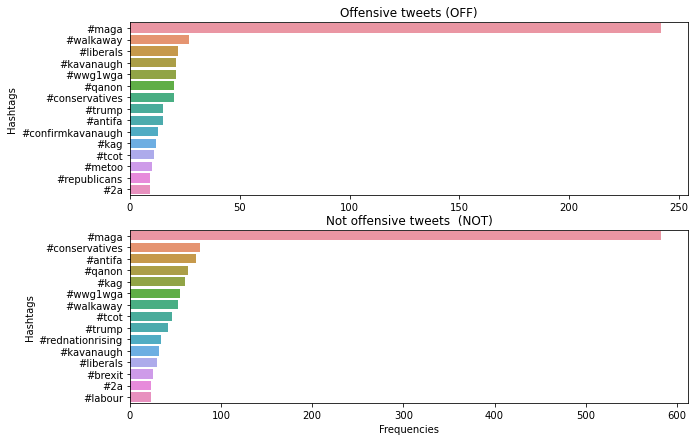

In [16]:
def create_hashtag_corpus(df, label, text, target):
    corpus=[]
    for x in df[df[label]==target][text].apply(lambda x:re.findall(r'#\w+', x)):
#     for x in df[df[label]==target][text].str.split():
        for i in x:
            corpus.append(i.lower())
    return corpus


fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,7))

corpus=create_hashtag_corpus(olid, 'subtask_a', 'tweet', 'OFF')
plot_common_words(corpus, ax1,15)
ax1.set_title('Offensive tweets (OFF)')
ax1.set_ylabel('Hashtags')
corpus=create_hashtag_corpus(olid, 'subtask_a', 'tweet', 'NOT')
plot_common_words(corpus, ax2,15)
ax2.set_title('Not offensive tweets  (NOT)')
ax2.set_ylabel('Hashtags')
ax2.set_xlabel('Frequencies')
# fig.suptitle('Histogram of hashtags', fontsize=16)
plt.savefig('./hist_hashtags.png')
# corpus=create_hashtag_corpus(olid, 'subtask_c', 'tweet', 'OTH')
# plot_common_words(corpus, ax3,10)


## Data cleaning

In [17]:
#### Emojis
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
# def remove_emoji(text):
#     emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            u"\U00002702-\U000027B0"
#                            u"\U000024C2-\U0001F251"
#                            "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

### Hashtags
def remove_hashtag(text):
    hashtag=re.compile(r'#\w+')
    return hashtag.sub(r'',text)

### Punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

### Mentions
def remove_mentions(text):
    mention=re.compile(r'@\w+')
    return mention.sub(r'',text)

### URL
def remove_URL(text):
    URL=re.compile(r'URL|&amp')
    return URL.sub(r'',text)

### Spell Checker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

def clean_tweets(df):

    df['tweet_cleaned'] = df['tweet'].str.lower().apply(lambda x: remove_emoji(x))\
                                    .apply(lambda x: remove_hashtag(x))\
                                    .apply(lambda x: remove_mentions(x))\
                                    .apply(lambda x: remove_URL(x))\
                                    .apply(lambda x: remove_punct(x))\
                                    .str.strip()
    #                                     .apply(lambda x: correct_spellings(x))\


    return df

def parallelize_cleaning(df, func, n_cores=10):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

# remove_URL(remove_punct(remove_mentions(remove_emoji(remove_hashtag(olid['tweet'][2]))))).strip()


In [ ]:

olid_clean = parallelize_cleaning(olid, clean_tweets)
olid_clean.to_csv('./olid.csv', index = False)

In [ ]:
olid.head(10)


In [ ]:
olid_clean.to_csv('./olid.csv', index = False)

## Test Data

In [ ]:
olid_testa = pd.read_csv('../data/OLID/testset-levela.tsv', sep = '\t')
olid_testa_labels = pd.read_csv('../data/OLID/labels-levela.csv', header = None)
olid_testa_labels.columns = ['id', 'subtask_a']

olid_testa = pd.merge(olid_testa, olid_testa_labels)
olid_testa_clean = parallelize_cleaning(olid_testa, clean_tweets)

olid_testa_clean.to_csv('./olid-levela.csv', index = False)
# olid_testa_labels


In [ ]:
# pd.read_csv('./data/OLID/testset-levela.tsv', sep = '\t')

In [ ]:
# string.punctuation